# Gradient descent
Gradient descent is a common technique for optimization and is commonly applied to machine learning. Given some function $f: \mathbb{R}^m \rightarrow \mathbb{R}$, the goal is to find some $x \in \mathbb{R}^m$ such that $f(x)$ is a minimum value of $f$.

## The gradient
Suppose $f$ is differentiable. Then, it has a gradient function $\nabla f: \mathbb{R}^m \rightarrow \mathbb{R}^m$ defined by $\nabla f_i = \frac{\delta f}{\delta x_i}$. A useful property of the gradient is that $\nabla f(x)$ points in the direction of steepest ascent; that is, starting at point $x$, we can move in the direction of $\nabla f(x)$ to maximize $f$.

Even if $f$ is not differentiable, there may exist ways to approximate a gradient.

## Gradient descent
The goal is to minimize $f$, and $\nabla f(x)$ points in the direction of steepest ascent. So to minimize $f(x)$, we can move $x$ in the direction opposite to $\nabla f(x)$. We can repeatedly move in the direction of $-\nabla f$ until we reach the minimum of $f$, indicated by $\nabla f = 0$. The gradient descent procedure may be illustrated as follows, where $\alpha$ is a constant known as the learning rate:
1. Let $x$ be some arbitrary initial value in $\mathbb{R}^m$.
2. While $\nabla f(x) \neq 0, x \gets x - \alpha \nabla f(x)$.

There are several techniques for selecting the learning rate $\alpha$. Some sophisticated techniques choose a different learning rate for each iteration. For our purposes, we can arbitrarily select some small value such as $\alpha = 0.5$.

In step 2, it can be rare for $\nabla f(x)$ to reach 0 due to computational limits, so often step 2 iterates while $||\nabla f(x)|| > \epsilon$ for some tolerance $\epsilon$.

## Examples
### Basic example
Consider the function $f(x) = x^2$. It is known that $\nabla f(x) = 2x$ and that $f$ attains its unique minimum of 0 at $x=0$. A plot is shown below.

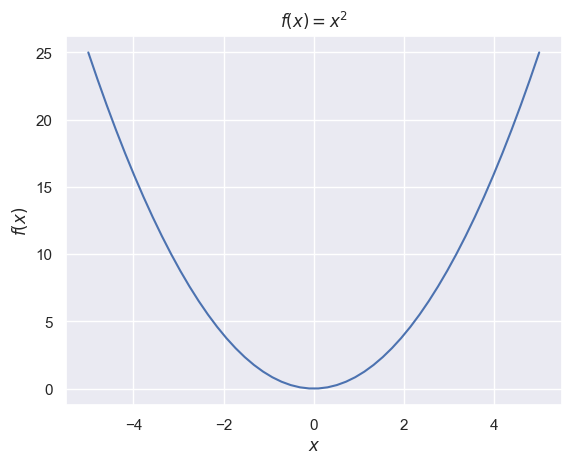

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

def f0(x):
    return x ** 2

def grad_f0(x):
    return 2 * x

x = np.linspace(-5, 5, 50)
y = f0(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("$f(x) = x^2$")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
plt.show()

Let's perform gradient descent. Abitrary let the initial $x$ be 4.

In [ ]:
def gradient_descent(f, grad_f, init_x, learn_rate, epsilon=0.01):
    x = init_x
    x_vals = [x]
    f_vals = [f(x)]
    gradient = grad_f(x)
    while np.linalg.norm(gradient) > epsilon:
        x = x - learn_rate * gradient
        x_vals.append(x)
        f_vals.append(f(x))
    return x_vals, f_vals
        
x_vals, f_vals = gradient_descent(f0, grad_f0, 4, 0.5)
print(x_vals, f_vals)